# Data Cleaning
#### **Bad data cloud be:**

1. Wrong data
2. Data in wrong format
3. Duplicaates
4. Empty cells/ missing values
5. Outliers

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'Age': [15,18,'18',19.4,'20+'],
                  'Gender': ['male','female','female','female','male']})

df

,Age,Gender
0,15,male
1,18,female
2,18,female
3,19.4,female
4,20+,male


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     5 non-null      object
 1   Gender  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


In [5]:
df.shape

(5, 2)

In [6]:
df['Age'].unique()

array([15, 18, '18', 19.4, '20+'], dtype=object)

### **1.Wrong Data**
 - Solution : Replace

In [7]:
df['Age'].replace({'20+':20},inplace=True)
df

,Age,Gender
0,15,male
1,18,female
2,18,female
3,19.4,female
4,20,male


### **2.Wrong data Type**
 - Solution : convert the data type

In [8]:
df['Age'] = df['Age'].astype('float')
df

,Age,Gender
0,15.0,male
1,18.0,female
2,18.0,female
3,19.4,female
4,20.0,male


### **3.Duplicates**
 - Solution : Remove

In [10]:
# to check the suplicates records
df.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [11]:
# total no.of duplicates in given data
df.duplicated().sum()

1

In [12]:
# to extract duplicate record
df[df.duplicated()]

,Age,Gender
2,18.0,female


In [14]:
# to extract non duplicated records
df[~df.duplicated()]

,Age,Gender
0,15.0,male
1,18.0,female
3,19.4,female
4,20.0,male


In [15]:
# to remove the duplicates
df.drop_duplicates(inplace=True,ignore_index=True)
df

,Age,Gender
0,15.0,male
1,18.0,female
2,19.4,female
3,20.0,male


# Missing Values
 - Solution : Either remove or replace

In [18]:
df = pd.DataFrame({'Age':  [15,np.nan,24,19,20,22],
                  'Gender': ['male',np.nan,'female','female','male',np.nan]})

df

,Age,Gender
0,15.0,male
1,NaN,NaN
2,24.0,female
3,19.0,female
4,20.0,male
5,22.0,NaN


In [19]:
# to check the missing values records
df.isnull()

,Age,Gender
0,False,False
1,True,True
2,False,False
3,False,False
4,False,False
5,False,True


In [20]:
# to check total missing values
df.isnull().sum()

Age       1
Gender    2
dtype: int64

In [22]:
# to check percentage of missing values in each variable
df.isnull().sum()/len(df)*100

Age       16.666667
Gender    33.333333
dtype: float64

#### **1.Remove the rows that contain missing values**

In [24]:
df2 = df.dropna()
df2

,Age,Gender
0,15.0,male
2,24.0,female
3,19.0,female
4,20.0,male


In [25]:
df1 = df.drop(columns=['Gender'])
df1

,Age
0,15.0
1,NaN
2,24.0
3,19.0
4,20.0
5,22.0


### **Option 2.Replace the nan vales**

 - fill with values
 - continous variable --->Repplace with either mean or median
 - Discrete Variable -->Replace with mode

In [26]:
# to fill with a value
df['Age'].fillna(20)

0    15.0
1    20.0
2    24.0
3    19.0
4    20.0
5    22.0
Name: Age, dtype: float64

In [28]:
# to fill with mean
df['Age'].fillna(df['Age'].mean())

0    15.0
1    20.0
2    24.0
3    19.0
4    20.0
5    22.0
Name: Age, dtype: float64

In [29]:
# to fill with median
df['Age'].fillna(df['Age'].median())

0    15.0
1    20.0
2    24.0
3    19.0
4    20.0
5    22.0
Name: Age, dtype: float64

In [30]:
# to fill with mode
df['Gender'].fillna(df['Gender'].mode())

0      male
1      male
2    female
3    female
4      male
5       NaN
Name: Gender, dtype: object

# Outlier

In [32]:
df = pd.DataFrame({'marks': [10,11,23,25,25,27,31,33,34,34,36,36,43,50,59]})
df

,marks
0,10
1,11
2,23
3,25
4,25
5,27
6,31
7,33
8,34
9,34


#### **Various ways to finding the outlier**
1. Boxplot

      Indetifying Outlier based on boxplot

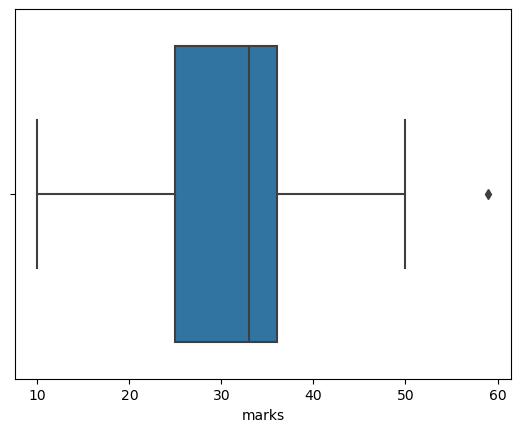

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['marks'])
plt.show()

In [ ]:
#### **Indentifying Outliers based on IQR**

In [37]:
# calculate Q1
Q1 = df['marks'].quantile(0.25)
print('Q1:',Q1)

#calculate Q3
Q3 = df['marks'].quantile(0.75)
print('Q3:',Q3)

#calculate IQR
IQR = Q3 - Q1
print('IQR:',IQR)

#alculate lower limit of outlier
lower_limit = Q1 - (IQR * 1.5)
print('lower limit:',lower_limit)

#calculate upper limit outlier
upper_limit = Q3 + (IQR * 1.5)
print('upper_limit:',upper_limit)

Q1: 25.0
Q3: 36.0
IQR: 11.0
lower limit: 8.5
upper_limit: 52.5


#### **Outlier Data**

In [39]:
df[(df['marks']<lower_limit) | (df['marks']>upper_limit)]

,marks
14,59


#### **Solution : 3R Technique

 1. Remove (remove the uotliers from dataset)
 2. replace the outliers
      - Rectify or replace-->(data entry error)-->Ask ans confirm it from the data          Engineering team
      - Replace with upper limit & lower limit based on IQR
      - Retain (consider for analysis)-->Treat them seperately
   
#### **Remove**

In [40]:
df.drop(index=[14])

,marks
0,10
1,11
2,23
3,25
4,25
5,27
6,31
7,33
8,34
9,34


#### **Replace**
 - BAsed on confirmation from data engineer team / based on research / based on domain expertise
    Replace based in statistics

 - **winsorization** - replacing the outlier statically with lower_limit & upper_limit values   

In [41]:
df['marks'] = df['marks'].clip(lower=8.5,upper=52.5)
df

,marks
0,10.0
1,11.0
2,23.0
3,25.0
4,25.0
5,27.0
6,31.0
7,33.0
8,34.0
9,34.0


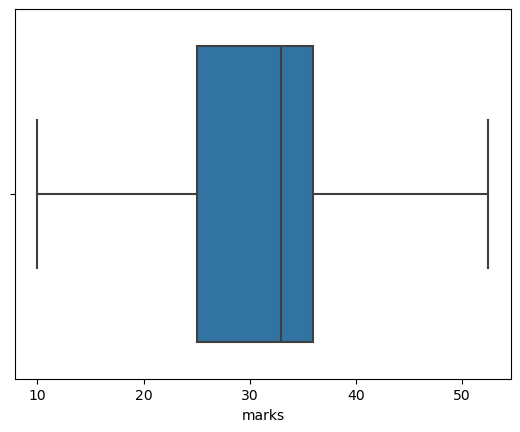

In [42]:
sns.boxplot(x=df['marks'])
plt.show()